<a href="https://colab.research.google.com/github/CHANDRALEKAGOMATHISANKAR1101/CHANDRALEKAGOMATHISANKAR1101/blob/main/Copy_of_finaldigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.9.16
Tensorflow version: 2.12.0
Keras version: 2.12.0


In [ ]:
%load_ext tensorboard

In [ ]:
!rm -rf ./.logs/

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
#Dimension of train and test data 
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [ ]:
test.info(),  test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [ ]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

In [ ]:
#Visualizing the data using TSNE 
# WARNING: running t-SNE on the full data set takes a while.
X_tsn = X/255

from sklearn.manifold import TSNE
tsne = TSNE()

tsne_res = tsne.fit_transform(X_tsn)


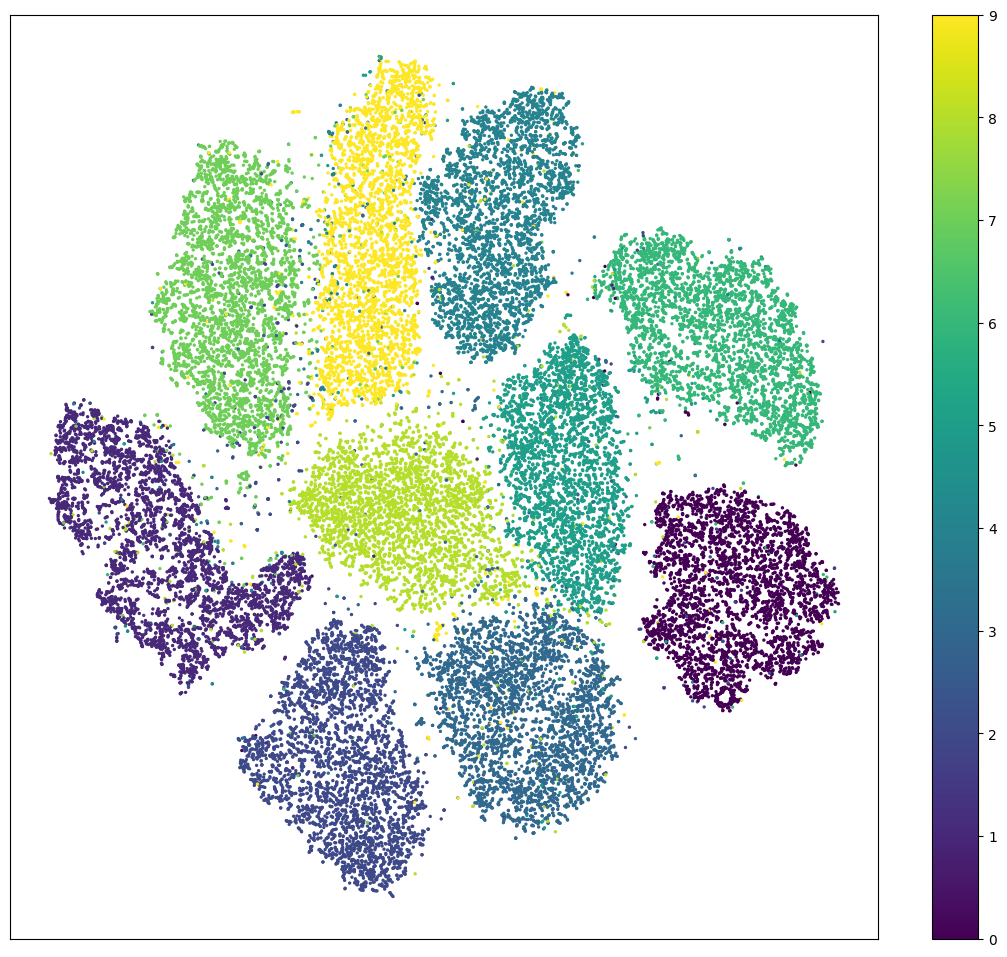

In [ ]:
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar();


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

In [ ]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


In [ ]:
#Converting training, testing, and validation data into array
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

In [ ]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


In [ ]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [ ]:
#Explore the data
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


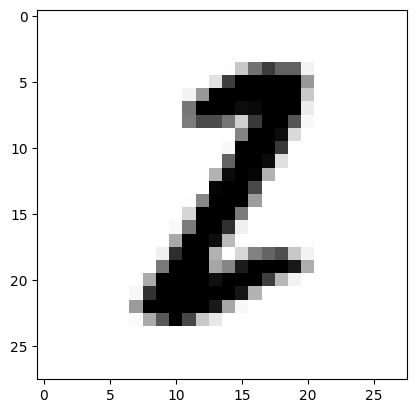

In [ ]:
#Visualise how the digits were written 
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
#print some more training examplesnumbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

NameError: ignored

In [ ]:
# Reshaping train, test, and validation data 
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [ ]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


In [ ]:
#Normalize train, test, and validation data
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [ ]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [ ]:
 #Build the CNN model to Classify Handwritten Digits 
 model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [ ]:
#Training model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

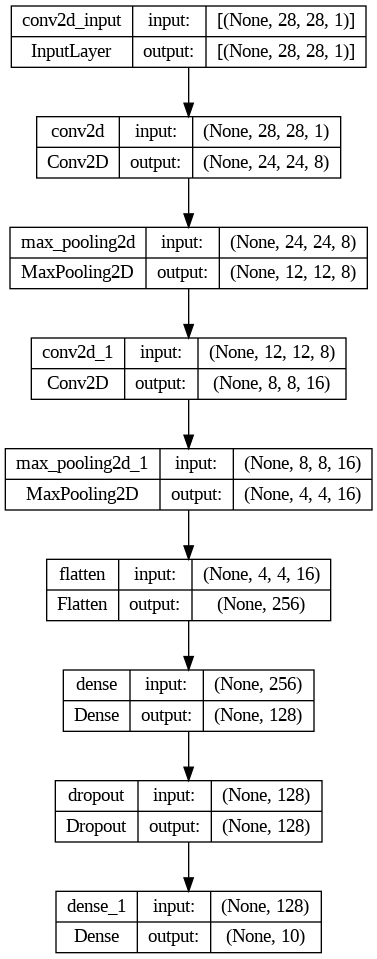

In [ ]:
#Visualization model
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
#Compile the model using keras.optimizers.Adam
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
#train the model
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 30s 25ms/step - loss: 0.2909 - accuracy: 0.9125 - val_loss: 0.0990 - val_accuracy: 0.9701
Epoch 2/10
1050/1050 [==============================] - 27s 26ms/step - loss: 0.0955 - accuracy: 0.9714 - val_loss: 0.0770 - val_accuracy: 0.9776
Epoch 3/10
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0694 - accuracy: 0.9776 - val_loss: 0.0542 - val_accuracy: 0.9839
Epoch 4/10
1050/1050 [==============================] - 25s 23ms/step - loss: 0.0537 - accuracy: 0.9829 - val_loss: 0.0633 - val_accuracy: 0.9821
Epoch 5/10
1050/1050 [==============================] - 25s 24ms/step - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0533 - val_accuracy: 0.9851
Epoch 6/10
1050/1050 [==============================] - 24s 23ms/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.0523 - val_accuracy: 0.9850
Epoch 7/10
1050/1050 [==============================] - 23s 21ms/step - loss: 0.0323 - accuracy: 0.9890 - val_loss: 0.0493 -

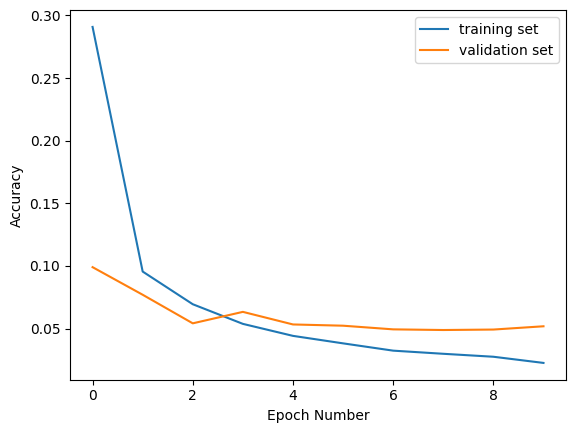

In [ ]:
#model evalution
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

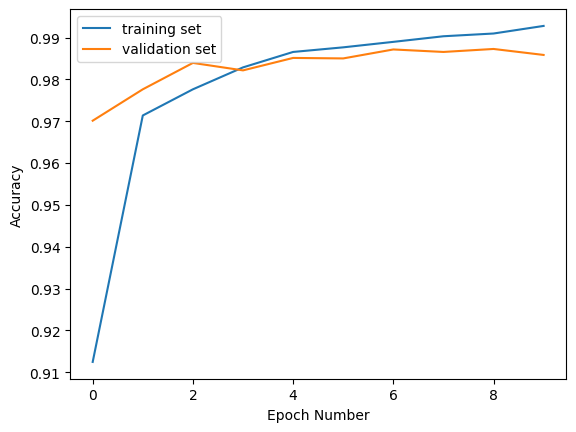

In [ ]:
#Accuracy plot curve for training and validation
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [ ]:
#Evaluation of the model accuracy
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)


In [ ]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.013991845771670341
Train accuracy:  0.9957737922668457


In [ ]:
#Performance of validation dataset 
%%capture
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)

In [ ]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')


In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

In [ ]:
# Visualise validation predicted data on how the digits were written
predictions_one_hot = loaded_model.predict([x_validation_normalized])


263/263 [==============================] - 2s 7ms/step


In [ ]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


In [ ]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,3.236917e-08,9.999999e-01,1.232007e-08,1.897604e-12,1.327683e-08,6.294534e-11,1.629523e-10,1.614717e-08,1.298910e-08,4.008876e-09
1,1.365003e-10,4.440152e-08,1.370501e-08,9.999358e-01,5.837461e-12,6.343159e-05,1.981050e-11,3.369756e-08,7.008839e-09,5.820476e-07
2,7.004208e-08,1.879505e-07,2.213996e-05,2.295372e-05,1.549346e-08,6.271922e-04,7.003023e-05,5.417427e-09,9.992573e-01,1.516954e-07
3,5.379560e-09,9.999902e-01,2.681337e-07,4.757786e-10,5.343811e-06,2.936186e-08,5.499742e-09,3.439681e-06,4.199066e-07,3.065833e-07
4,4.949894e-10,2.271363e-14,6.218030e-09,2.007021e-08,5.052120e-07,5.090347e-08,4.548402e-16,2.443143e-07,7.117887e-07,9.999984e-01
...,...,...,...,...,...,...,...,...,...,...
8395,1.150755e-17,3.320350e-13,4.461686e-12,3.113894e-18,9.999999e-01,9.858982e-16,2.010908e-13,6.073774e-18,7.711428e-19,8.357902e-14
8396,2.693152e-11,8.644220e-13,1.260964e-13,3.696401e-13,1.289749e-14,9.999990e-01,1.003673e-06,7.906045e-19,7.213592e-10,1.104328e-17
8397,6.817714e-12,6.073464e-09,1.348248e-09,6.492326e-10,1.043890e-08,2.975410e-10,5.381826e-13,9.999976e-01,6.995738e-10,2.361320e-06
8398,4.227574e-07,5.628831e-12,7.058877e-10,1.452859e-09,2.082454e-09,7.707989e-07,9.999987e-01,6.532865e-14,1.589553e-10,6.079488e-12


In [ ]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


In [ ]:
#print the first images of model
plt.imshow(x_validation_normalized[2].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

NameError: ignored

<ipython-input-52-f15184e95b81>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


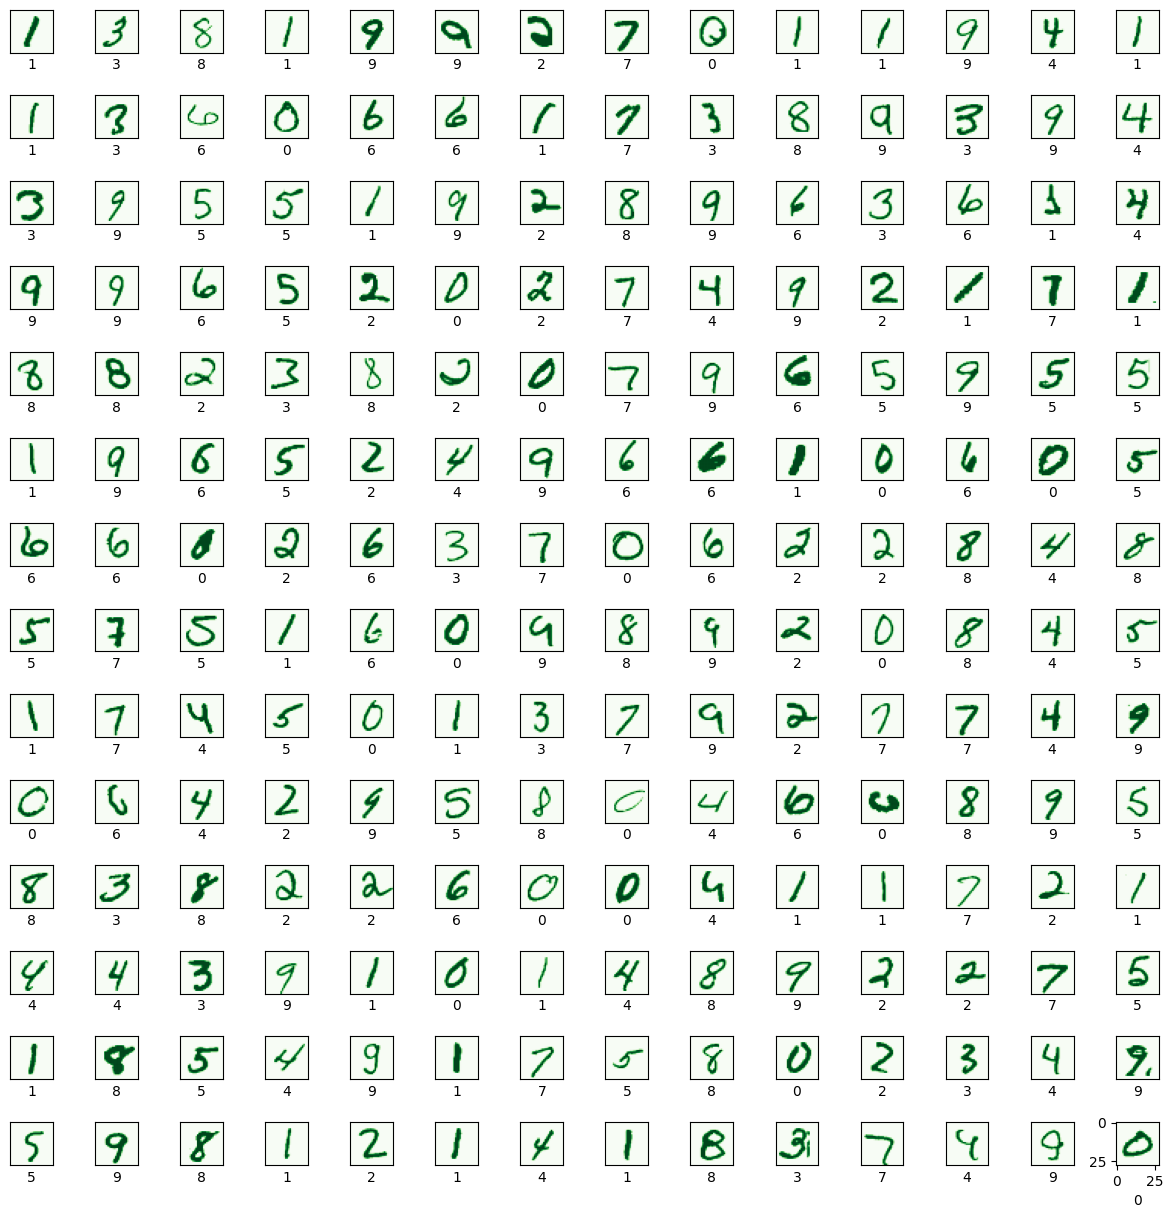

In [ ]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()


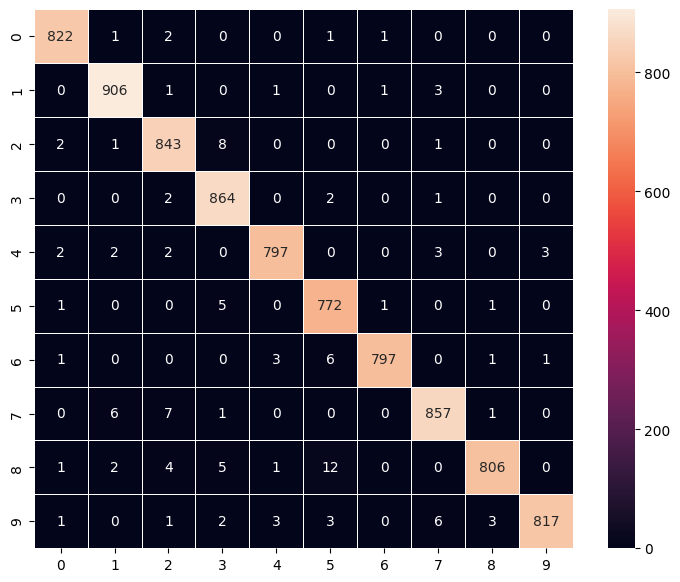

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [ ]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

875/875 [==============================] - 8s 9ms/step
predictions_one_hot: (28000, 10)


In [ ]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,9.067940e-10,1.094947e-07,9.999773e-01,2.257235e-05,7.215266e-10,6.790975e-11,5.702494e-12,1.300021e-08,3.498644e-10,2.368492e-11
1,9.999050e-01,1.274247e-06,1.197656e-05,3.984775e-08,2.501055e-10,6.085698e-05,7.099055e-07,2.009522e-05,1.090320e-09,2.151100e-09
2,9.408568e-07,2.182558e-08,1.170579e-06,1.053210e-06,2.731507e-04,2.103221e-05,1.368529e-09,5.523782e-06,3.877931e-04,9.993092e-01
3,1.904642e-01,1.593706e-09,7.328981e-04,2.752495e-04,5.579859e-03,2.196389e-06,1.117007e-06,3.424900e-04,6.113670e-05,8.025408e-01
4,8.566812e-11,9.105012e-09,2.438674e-07,9.999997e-01,3.251570e-15,8.712706e-09,2.424602e-12,5.058362e-10,2.993986e-10,3.873211e-11
...,...,...,...,...,...,...,...,...,...,...
27995,4.812473e-10,4.190171e-17,1.066094e-09,1.019792e-10,2.826210e-07,4.838794e-11,7.996133e-19,2.119014e-08,2.399647e-08,9.999996e-01
27996,9.224157e-10,2.068182e-07,1.913376e-05,2.624370e-07,5.338793e-08,4.084135e-09,4.181428e-12,9.998918e-01,9.568934e-09,8.840422e-05
27997,9.915325e-17,8.687777e-14,4.041232e-14,9.999999e-01,5.511127e-20,5.125834e-10,1.990541e-18,8.895962e-13,6.578649e-14,7.092997e-12
27998,1.029652e-08,4.245027e-10,1.262925e-09,1.010183e-08,4.417539e-07,1.599376e-09,3.911968e-15,1.447577e-05,1.624585e-08,9.999850e-01


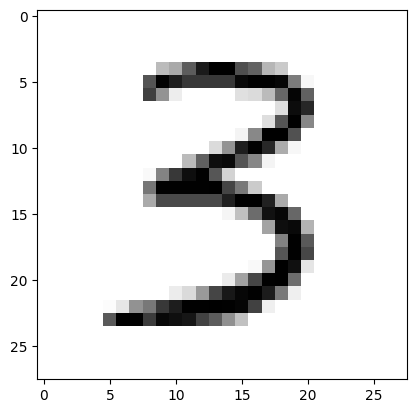

In [ ]:
plt.imshow(x_test_normalized[9].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

In [ ]:
 #Submission 
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

875/875 [==============================] - 11s 12ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [ ]:
test_pred.to_csv('submission.csv', index = False)

In [ ]:
import tensorflow as tf
!pip install gradio
import gradio as gr
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0, 
x_test = x_test / 255.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 34.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 k

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=6)


Epoch 1/6
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2666 - accuracy: 0.9232 - val_loss: 0.1424 - val_accuracy: 0.9580
Epoch 2/6
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1169 - accuracy: 0.9657 - val_loss: 0.1029 - val_accuracy: 0.9704
Epoch 3/6
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0800 - accuracy: 0.9756 - val_loss: 0.0864 - val_accuracy: 0.9714
Epoch 4/6
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0600 - accuracy: 0.9812 - val_loss: 0.0755 - val_accuracy: 0.9760
Epoch 5/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0465 - accuracy: 0.9852 - val_loss: 0.0853 - val_accuracy: 0.9729
Epoch 6/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.0766 - val_accuracy: 0.9774


In [ ]:
def classify(input):
    prediction = model.predict(input.reshape(1, 28, 28)).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

label = gr.outputs.Label(num_top_classes=3)
interface = gr.Interface(fn=classify, inputs="sketchpad", outputs=label, 
live=True)
interface.launch()

/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
interface.launch()